<h1>資料集

In [80]:
import pandas as pd
datapath="初賽資料/acct_transaction.csv"
df_csv = pd.read_csv(datapath)
print(df_csv.head())

                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...             1   

  is_self_txn    txn_amt  txn_date  txn_time currency_type channel_type  
0           N    47500.0        71  05:05:00           TWD           04 

In [81]:
alertpath="初賽資料/acct_alert.csv"
alertdf_csv = pd.read_csv(alertpath)
print(alertdf_csv.head())

                                                acct  event_date
0  80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...          87
1  b8c11db05d00b5ac66be10ffee5f6ce6ef9221c733a4bb...          19
2  daa05c68b290ac3cc522abad400c5304dffba07baa232c...          81
3  174e26ecc9cee56aaaca855c743a106275c58629740a49...          88
4  007cf5c98aa4f9f3e444c9cdaca74d0f7542e9a2804201...         117


In [82]:
predictpath="初賽資料/acct_predict.csv"
predictdf_csv = pd.read_csv(predictpath)
print(predictdf_csv.head())

                                                acct  label
0  fcf31c5113d3dbd9cb5056045c6a0f213bd8a4fc1bc834...      0
1  e21dfa45e990364194468e501fbfe52ec02a4b71a2e2e8...      0
2  2552e943aaf9caa33183758cd40128ef20a6e6ff16c232...      0
3  71700e7b7c3d40abdfdbcc7afc0752fa8d9bd28b408651...      0
4  c70349fc718ffb88f03f31b5a7fcf65b33dd71dce6fee0...      0


<h1>基礎前處理

In [83]:
#轉換金額至台幣
df_csv['currency_type'].value_counts()

currency_type
TWD    4382571
USD      23458
JPY      21545
CNY       2888
EUR       2233
HKD       1007
AUD        752
GBP        357
CAD        255
NZD        202
THB        199
ZAR        176
SGD        134
CHF         91
SEK         14
MXN          8
Name: count, dtype: int64

In [84]:
exchange_rate = {"TWD": 1,"USD": 30.4,"JPY": 0.21,"CNY": 4.27,"EUR": 35.71,"HKD": 3.91,"AUD": 20.07,"GBP": 40.97,
                 "CAD": 21.79,"NZD": 18.87,"THB": 1.18,"ZAR": 1.67,"SGD": 22.22,"CHF": 34.48,"SEK": 3.33,"MXN": 1.67}

df_csv['txn_amt_twd'] = df_csv.apply(lambda x: x['txn_amt'] * exchange_rate.get(x['currency_type'], 1), axis=1)

In [85]:
print(df_csv.head())

                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...             1   

  is_self_txn    txn_amt  txn_date  txn_time currency_type channel_type  \
0           N    47500.0        71  05:05:00           TWD           04

In [86]:
df_csv=df_csv.drop(labels=['txn_amt','currency_type'], axis=1)

In [87]:
print(df_csv.head())

                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...             1   

  is_self_txn  txn_date  txn_time channel_type  txn_amt_twd  
0           N        71  05:05:00           04      47500.0  
1         UNK        3

In [ ]:
#無意義行
df_csv['is_self_txn'].value_counts()

is_self_txn
UNK    3346272
N       943713
Y       145905
Name: count, dtype: int64

In [89]:
df_csv['channel_type'].value_counts()

channel_type
03     2008166
UNK    1701739
04      595522
06       58445
01       51364
02       15458
05        3505
99        1281
07         410
Name: count, dtype: int64

In [90]:
import pandas as pd


df_csv['txn_time_dt'] = pd.to_datetime(df_csv['txn_time'], format='%H:%M:%S')

# 轉成小時，分鐘四捨五入
df_csv['txn_hours'] = df_csv['txn_time_dt'].dt.hour + (df_csv['txn_time_dt'].dt.minute / 60)
df_csv['txn_hours'] = df_csv['txn_hours'].round()

# 刪除中間欄位
df_csv = df_csv.drop(columns=['txn_time_dt'])


print(df_csv.head())


                                           from_acct  from_acct_type  \
0  be6fdd2d0f9aa02b0b09436fb137654942e3346e16ab43...               1   
1  18f3d0e79217f8bc8b4cb485f9f80a884771b846de652f...               1   
2  302f3911cbf56bf9b5ad209a4b045a82380f98d92604c1...               1   
3  5a4809796865b1526f46e5dda6a35c1a4def3cbe969cc8...               1   
4  7f84214987bdee16ffbaf3d70824e6385ce80e032a24c5...               1   

                                             to_acct  to_acct_type  \
0  7abb16ac9bddc1f464981131ba68506775a964df2e0734...             1   
1  e77e425fb5f3ece7a7b431b3c43cc1d040f3054e35479d...             2   
2  4a707a0af2aa824777082803013610090033104c308023...             1   
3  d16b1bf33802f020b508002755c13aad549bc59dde7aae...             2   
4  c2e0f75b54f394b29755779ab9a488931e9d893a0e5f8f...             1   

  is_self_txn  txn_date  txn_time channel_type  txn_amt_twd  txn_hours  
0           N        71  05:05:00           04      47500.0        5.0  


<h1>視覺化區

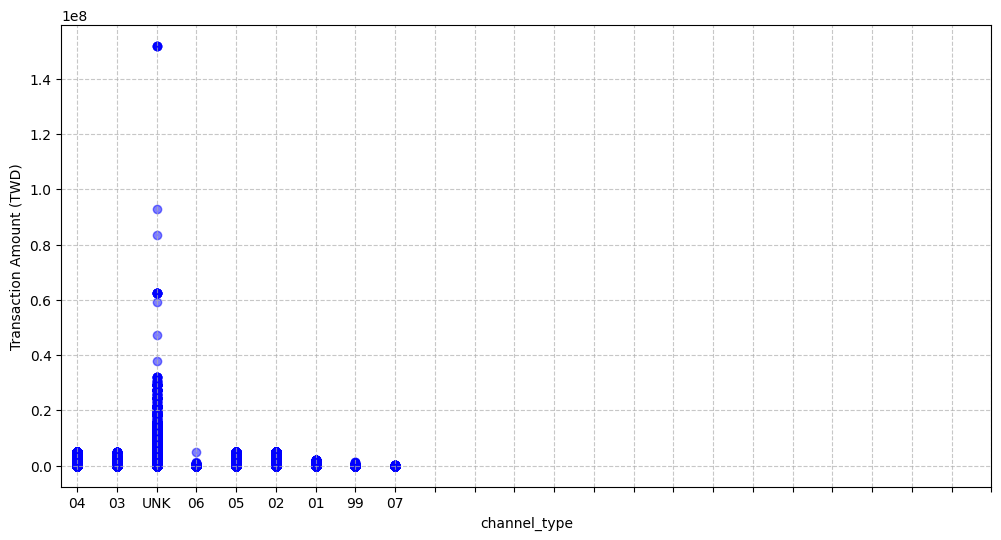

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_csv['channel_type'], df_csv['txn_amt_twd'], alpha=0.5, color='blue')
plt.xlabel('channel_type')
plt.ylabel('Transaction Amount (TWD)')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#UNK是重點

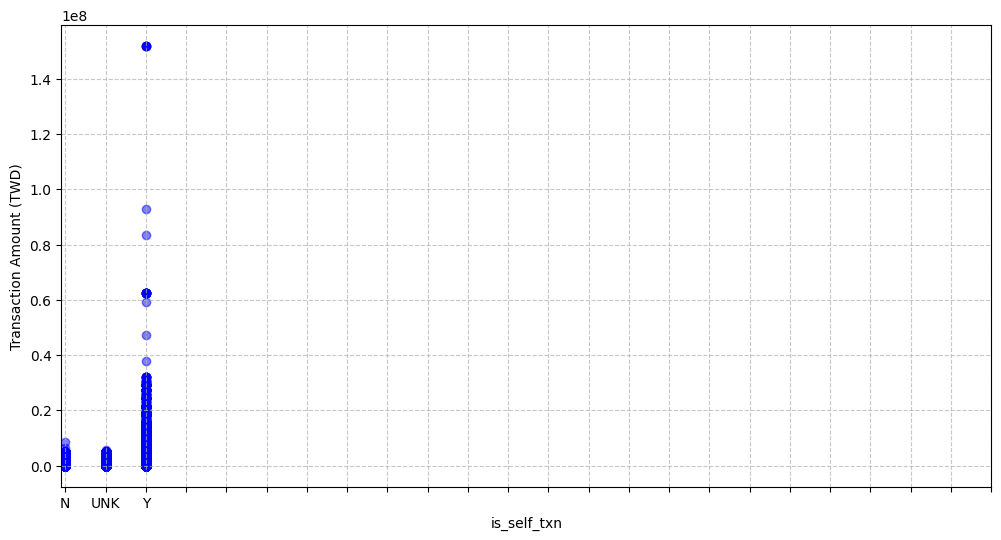

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_csv['is_self_txn'], df_csv['txn_amt_twd'], alpha=0.5, color='blue')
plt.xlabel('is_self_txn')
plt.ylabel('Transaction Amount (TWD)')
plt.xticks(range(0,24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#Y是重點

<h1>預計金額分析

In [93]:
df_csv['txn_amt_twd'].value_counts()

txn_amt_twd
1050.00        305525
2050.00        210996
10500.00       199429
3050.00        160402
5050.00        159332
                ...  
131458.50           1
85.05               1
20216000.00         1
8406500.00          1
12596500.00         1
Name: count, Length: 2142, dtype: int64

In [94]:
import numpy as np

data = df_csv['txn_amt_twd']

stats = {
    '筆數 (count)': len(data),
    '平均數 (mean)': np.mean(data),
    '中位數 (median)': np.median(data),
    '變異數 (variance)': np.var(data, ddof=1),     
    '標準差 (std)': np.std(data, ddof=1),
    '最小值 (min)': np.min(data),
    '最大值 (max)': np.max(data),
    'Q1 (第1四分位數)': np.percentile(data, 25),
    'Q3 (第3四分位數)': np.percentile(data, 75)
}

for k, v in stats.items():
    print(f"{k}：{v:.2f}")


筆數 (count)：4435890.00
平均數 (mean)：45725.01
中位數 (median)：4850.00
變異數 (variance)：164675437069.99
標準差 (std)：405802.21
最小值 (min)：3.15
最大值 (max)：152000000.00
Q1 (第1四分位數)：1350.00
Q3 (第3四分位數)：19500.00


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170:

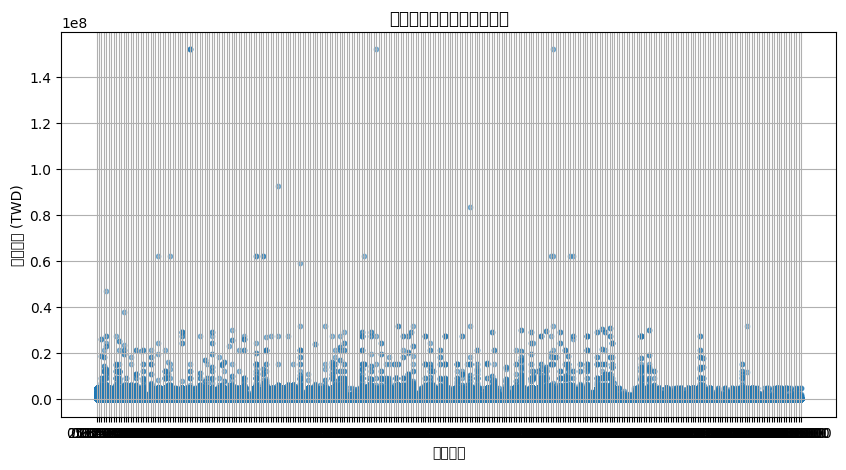

In [95]:
plt.figure(figsize=(10,5))
plt.scatter(df_csv['txn_time'], df_csv['txn_amt_twd'], s=10, alpha=0.5)
plt.title('交易金額與交易時間散佈圖')
plt.xlabel('交易時間')
plt.ylabel('交易金額 (TWD)')
plt.grid(True)
plt.show()


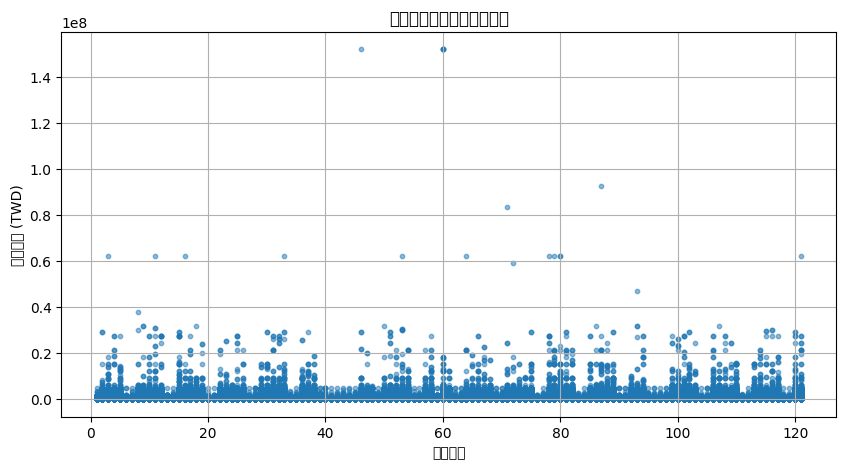

In [96]:
plt.figure(figsize=(10,5))
plt.scatter(df_csv['txn_date'], df_csv['txn_amt_twd'], s=10, alpha=0.5)
plt.title('交易金額與交易時間散佈圖')
plt.xlabel('交易時間')
plt.ylabel('交易金額 (TWD)')
plt.grid(True)
plt.show()

<h1>帳戶出現頻率分析

In [97]:
df_csv['from_acct'].value_counts()

from_acct
9c9c68dc900bd19a85c4c4c9517b41b0fcbb92f853e816d9cd490459b5fad59e    1462
20548b07e40056dcc930c8a13641c6a077eaf284adf90fdc94e61ddd84ce7e31    1453
f3e4b82f23275158d90b546220b48a1cfee6a89fef1ffde7be00444bfde50952    1434
1280e3ff68a32130465521db74a9a4cce6c4f4ce2dfb2a2c610b92f90d210a72    1433
6c38beb861aa4a0af60f71363352800ca63912d34446f15682fee62775e3c977    1422
                                                                    ... 
2b32c138be46ae274f171ba5b371957ce4d6fd72f46d6e58da8aa20715a0f362       1
2525f405586d3cf276d8bea7c41e24aa16f0945d9b8f285ebe40c14be9802e27       1
939713b32b033dbea3bcb5efe2237cedeb205475426b8c1b62f3f1e6bc149a92       1
37e4b1895f302baeab91fa5cce53765e2342e39034edbc0e4c7a19ee1cfb7161       1
3c619e2a5e7ae06579f85d2107cd778d11282385d097001d8d8b055ba6e0580d       1
Name: count, Length: 819399, dtype: int64

In [98]:
df_csv['to_acct'].value_counts()

to_acct
c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a19b9f5009baebbfc979    1479
bd9aa1c8983a32bbf93a87e4c4a3ccda1b2f6a304cb7e1262cef194409100094    1442
5db998ffe3f28f7b13b6cc2d4b209489a1f7f2b9771c527170751b43d8b539ef    1435
81ac134bf4fc2199e2b128e6a1a47f283c3b4a154339515e6c0ce51c9540c6e9    1435
4e9421ba28dd209fb44ab973eeb12955c6fb79f49b59654aeb16e75e141e49ab    1384
                                                                    ... 
82ac67d6aa25a70c7e53d8291e367d312f559ceff45c0c97a744ba70eacc377a       1
9b580ede931f58c49be2fe5c1b68267f1968082af7b400531efa173684790cfd       1
d748406930195cf8f0450dbf5387f6657d1dc4c1380a0da8bb39b7ebab8ede81       1
20668a2e25f1171c861637f2b6f48a9626bbd3ec4756a4c37103710169e092e5       1
198541047012648d1af8612f1a1fe77fc8189337d47f878698b9e819b5095e23       1
Name: count, Length: 1169482, dtype: int64

In [99]:
#先不執行
# 計算每個帳號出現次數
acct_counts = df_csv['to_acct'].value_counts()

# 將原 DataFrame 按照 from_acct 出現頻率排序
df_csv = df_csv.copy()
df_csv['to_acct_freq'] = df_csv['to_acct'].map(acct_counts)
df_csv = df_csv.sort_values(by='to_acct_freq', ascending=False)

print(df_csv)

                                                 from_acct  from_acct_type  \
1560217  0dabd6df1dbdf5689005b02803f135333b95ee07ac2a1c...               2   
2923493  898f0592f44d69e243e4439233f41dfd0b8ec57f02642a...               2   
4221679  761b9ca10350e3df4208523a8c12e818b3b4de862c1f4c...               2   
2389906  9f99a5a92a2706d5db6b3c4b02ad314e2df06d56da07ec...               2   
178422   974e1debf79b26e22b6f61bf9ba85aaa7f3c2b176fb1a0...               2   
...                                                    ...             ...   
143      c7f49c0aec43350368362b4893c0140c3de8fad0e61510...               1   
153      74516a163da89f2b69fa6ad66f03c157139d0ca4e7b7f7...               1   
156      e697eae3095e649c36e9687b1f2590b0ad2cb9bcbc6280...               1   
158      6f76e6e333f5c0585c381f077dfa047de6db1ac8315109...               1   
160      d3027f0913cfa7407f996455026eef090600aaf3b0a214...               1   

                                                   to_acct  to_

<h1>acct_transaction加label做XGBoost

In [100]:
df_csv

,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_date,txn_time,channel_type,txn_amt_twd,txn_hours,to_acct_freq
1560217,0dabd6df1dbdf5689005b02803f135333b95ee07ac2a1c...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,37,18:00:00,UNK,455.0,18.0,1479
2923493,898f0592f44d69e243e4439233f41dfd0b8ec57f02642a...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,16,08:25:00,UNK,2050.0,8.0,1479
4221679,761b9ca10350e3df4208523a8c12e818b3b4de862c1f4c...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,4,11:05:00,UNK,795.0,11.0,1479
2389906,9f99a5a92a2706d5db6b3c4b02ad314e2df06d56da07ec...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,91,01:35:00,UNK,305.0,2.0,1479
178422,974e1debf79b26e22b6f61bf9ba85aaa7f3c2b176fb1a0...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,58,22:40:00,UNK,535.0,23.0,1479
...,...,...,...,...,...,...,...,...,...,...,...
143,c7f49c0aec43350368362b4893c0140c3de8fad0e61510...,1,4badf0a0a8163dc945a963c05a7163a20b05b85f2df6c0...,2,UNK,45,22:25:00,03,1050.0,22.0,1
153,74516a163da89f2b69fa6ad66f03c157139d0ca4e7b7f7...,1,a9c9967d09b3f621ce0998a485661364773f48f7a94ee9...,2,UNK,16,23:10:00,03,1950.0,23.0,1
156,e697eae3095e649c36e9687b1f2590b0ad2cb9bcbc6280...,1,ec2b3fde9136ca67686d7cf7ed571bdcb3cf265d6ff993...,2,UNK,30,17:35:00,03,1650.0,18.0,1
158,6f76e6e333f5c0585c381f077dfa047de6db1ac8315109...,1,3eb20828dbe691ec8d37735327abbe8a10002642fad4a2...,2,UNK,49,08:55:00,03,10500.0,9.0,1


In [101]:
alertdf_csv

,acct,event_date
0,80bd1c28b47357a3d37a01835ebb1bed5edf54e791bd3d...,87
1,b8c11db05d00b5ac66be10ffee5f6ce6ef9221c733a4bb...,19
2,daa05c68b290ac3cc522abad400c5304dffba07baa232c...,81
3,174e26ecc9cee56aaaca855c743a106275c58629740a49...,88
4,007cf5c98aa4f9f3e444c9cdaca74d0f7542e9a2804201...,117
...,...,...
999,0dc3b10899fbf31411e3a32f2720ab7e8f9623423d2265...,4
1000,ac5a41e0717ce2f54d7246e708b877dc4eb19200ee61e0...,53
1001,640028cfabeb311532334fe930a1ccb82a476115854ff3...,16
1002,a968f594605939475eb3683a69e2f996842d15a4b36263...,106


In [102]:
predictdf_csv

,acct,label
0,fcf31c5113d3dbd9cb5056045c6a0f213bd8a4fc1bc834...,0
1,e21dfa45e990364194468e501fbfe52ec02a4b71a2e2e8...,0
2,2552e943aaf9caa33183758cd40128ef20a6e6ff16c232...,0
3,71700e7b7c3d40abdfdbcc7afc0752fa8d9bd28b408651...,0
4,c70349fc718ffb88f03f31b5a7fcf65b33dd71dce6fee0...,0
...,...,...
4775,09747f71cc6234a75312f2e77f79b9a51e5145e114e8b0...,0
4776,32e6bf3ca071af026794f4df028f3cdaa43ddd499bac10...,0
4777,e9a6861c68821da506be76419df559efc167ef8a056063...,0
4778,75ca5a3798f3cad4c0e1c1fd0adca48f020b2bda856a8e...,0


In [ ]:
df_csv = df_csv.drop(columns=['txn_date','to_acct_freq','txn_time])


In [104]:
df_csv

,from_acct,from_acct_type,to_acct,to_acct_type,is_self_txn,txn_time,channel_type,txn_amt_twd,txn_hours
1560217,0dabd6df1dbdf5689005b02803f135333b95ee07ac2a1c...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,18:00:00,UNK,455.0,18.0
2923493,898f0592f44d69e243e4439233f41dfd0b8ec57f02642a...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,08:25:00,UNK,2050.0,8.0
4221679,761b9ca10350e3df4208523a8c12e818b3b4de862c1f4c...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,11:05:00,UNK,795.0,11.0
2389906,9f99a5a92a2706d5db6b3c4b02ad314e2df06d56da07ec...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,01:35:00,UNK,305.0,2.0
178422,974e1debf79b26e22b6f61bf9ba85aaa7f3c2b176fb1a0...,2,c13b8b2bc512b7cbb49d1860ce144e38119ec2745741a1...,1,UNK,22:40:00,UNK,535.0,23.0
...,...,...,...,...,...,...,...,...,...
143,c7f49c0aec43350368362b4893c0140c3de8fad0e61510...,1,4badf0a0a8163dc945a963c05a7163a20b05b85f2df6c0...,2,UNK,22:25:00,03,1050.0,22.0
153,74516a163da89f2b69fa6ad66f03c157139d0ca4e7b7f7...,1,a9c9967d09b3f621ce0998a485661364773f48f7a94ee9...,2,UNK,23:10:00,03,1950.0,23.0
156,e697eae3095e649c36e9687b1f2590b0ad2cb9bcbc6280...,1,ec2b3fde9136ca67686d7cf7ed571bdcb3cf265d6ff993...,2,UNK,17:35:00,03,1650.0,18.0
158,6f76e6e333f5c0585c381f077dfa047de6db1ac8315109...,1,3eb20828dbe691ec8d37735327abbe8a10002642fad4a2...,2,UNK,08:55:00,03,10500.0,9.0
